## MIE1624 Assignment 2
Zhuojun Li
<br>
999697476

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as sns
from scipy import stats
import itertools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV

## 1. Data Cleaning

Before performing the classification algorithm, we first need to clean the training and testing data.
- Handling missing value
- Convert categorical data into numerical value

In [2]:
trainingDF = pd.read_csv("income-training.csv")
testingDF = pd.read_csv("income-testing.csv")

In [3]:
trainingDF.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K


### Missing Values
There are three columns that have missing values, **WorkClass**, **Occupation** and **NativeCountry**.<br>
We first take a look at the missing value in **WorkClass** column.
#### WorkClass Nulls

In [4]:
trainingDF[trainingDF.WorkClass.isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
9,65,NaN,137354,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,20,United-States,<50K
29,18,NaN,118847,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,24,United-States,<50K
95,63,NaN,321403,9th,5,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States,<50K
107,49,NaN,227690,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<50K
150,31,NaN,26553,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,25,United-States,>100K
154,17,NaN,297117,11th,7,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,<50K
160,31,NaN,672412,11th,7,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States,<50K
184,63,NaN,166425,Some-college,10,Widowed,NaN,Not-in-family,Black,Female,0,0,24,United-States,<50K
192,20,NaN,133515,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,15,France,<50K
271,18,NaN,152641,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<50K


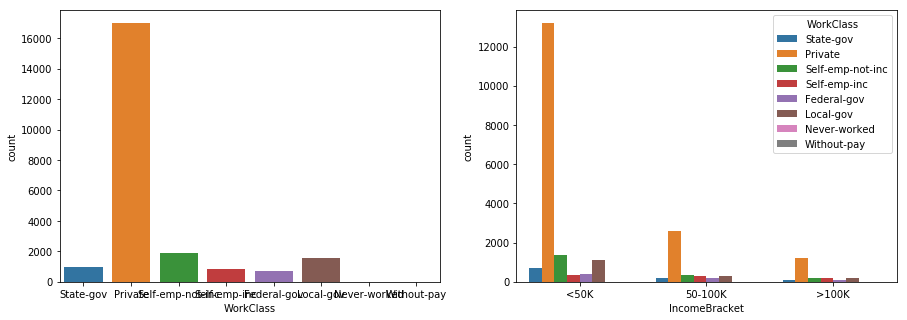

In [5]:
#Plot the counts for WorkClass and WorkClass by IncomeBracket
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Plot the number of occurances for each workclass
sns.countplot(x='WorkClass', data=trainingDF, ax=ax1)

# Plot the income brackets by workclass
sns.countplot(x='IncomeBracket', hue = 'WorkClass', data=trainingDF,ax=ax2)


We can see that in each income bracket, the private work class is the most frequent class, therefore we assign the missing value in WorkClass column to **'Private'**. 

In [6]:
#Set value
trainingDF = trainingDF.set_value(trainingDF['WorkClass'].isnull(), 'WorkClass','Private')
testingDF = testingDF.set_value(testingDF['WorkClass'].isnull(), 'WorkClass','Private')

In [7]:
#Verify that missing value has been assigned
trainingDF[trainingDF['WorkClass'].isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket


In [8]:
testingDF[testingDF['WorkClass'].isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket


#### Occupation Nulls

In [9]:
trainingDF[trainingDF.Occupation.isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
9,65,Private,137354,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,20,United-States,<50K
29,18,Private,118847,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,24,United-States,<50K
95,63,Private,321403,9th,5,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States,<50K
107,49,Private,227690,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<50K
150,31,Private,26553,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,25,United-States,>100K
154,17,Private,297117,11th,7,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,<50K
160,31,Private,672412,11th,7,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States,<50K
184,63,Private,166425,Some-college,10,Widowed,NaN,Not-in-family,Black,Female,0,0,24,United-States,<50K
192,20,Private,133515,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,15,France,<50K
271,18,Private,152641,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<50K


In [10]:
#For all missing occupation, check what the corresponding work classes
nullOcc = trainingDF[trainingDF.Occupation.isnull()]
nullOcc.groupby('WorkClass')['Occupation'].count()

WorkClass
Never-worked    0
Private         0
Name: Occupation, dtype: int64

As we can see above, for all the null values in Occupation column, the corresponding WorkClass is either **Private** or **Never-worked**.<br>
From the available columns, education level is the most relevant attribute for us to assign the missing values. Therefore, we get the most frequent occupation for each educaiton level, and assign the missing occupation values to the most frequent one based on their education level.

In [11]:
#Get the most frequent occupation by education level for the Private WorkClass
temp_occupation = trainingDF[['WorkClass','Occupation','EducationLvl']]
temp_occupation = temp_occupation[temp_occupation.WorkClass.isin(['Private'])]
temp_occupation = temp_occupation[['Occupation','EducationLvl']]
temp_occupation.groupby(['EducationLvl']).agg(lambda x:x.value_counts().index[0])

,Occupation
EducationLvl,
1,Farming-fishing
2,Other-service
3,Machine-op-inspct
4,Craft-repair
5,Machine-op-inspct
6,Other-service
7,Other-service
8,Other-service
9,Craft-repair


In [12]:
#Function to assign value to NaNs in occupation column
def fixNaNOcc(occupation, education, workclass):
    if occupation == occupation:
        return occupation
    if workclass == 'Never-worked':
        return 'Never-worked'
    if education == 1:
        return 'Farming-fishing'
    elif education == 2 or education == 6 or education == 7 or education == 8:
        return 'Other-service'
    elif education == 3 or education == 5:
        return 'Machine-op-inspct'
    elif education == 4 or education == 9 or education == 11:
        return 'Craft-repair'
    elif education == 10 or education == 12:
        return 'Adm-clerical'
    elif education == 13:
        return 'Exec-managerial'
    else:
        return 'Prof-specialty'

Now we fill the occupation NaNs in both training and testing dataset and verify if there's any null values.

In [13]:
trainingDF['Occupation'] = trainingDF.apply(lambda row: fixNaNOcc(row['Occupation'],row['EducationLvl'],row['WorkClass']),axis=1)
testingDF['Occupation'] = testingDF.apply(lambda row: fixNaNOcc(row['Occupation'],row['EducationLvl'],row['WorkClass']),axis=1)

In [14]:
#Verify that missing value has been assigned
trainingDF[trainingDF['Occupation'].isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket


In [15]:
testingDF[testingDF['Occupation'].isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket


#### NativeCountry Nulls
Since we do not have enough informaiton to fill the missing nationality properly, we would just be dropping this feature entirely.

In [16]:
trainingDF = trainingDF.drop(['NativeCountry'], axis=1)
testingDF = testingDF.drop(['NativeCountry'], axis=1)

### Convert categorical data into numerical value
Since the EducationLvl column is already the numerical form for Education column, we would just drop the Education column and use EducationLvl column instead.

In [17]:
trainingDF = trainingDF.drop(['Education'],axis=1)
testingDF = testingDF.drop(['Education'],axis=1)

Then, we convert the categorical data by encoding the categorical values with dummy variables.<br>

The six categorical features we have are **WorkClass**, **MaritalStatus**, **Occupation**, **Relationship**, **Race**, and **Sex**. We can convert these via onehotencoding where each category for each feature becomes a new column. A category's column will get a value of 1 if the original feature belonged to that category. Only one of the categorical feature columns can have of 1.

In [18]:
#Create dummy features for each categorical feature
dummies_workclass_train = pd.get_dummies(trainingDF['WorkClass'], prefix='WorkClass')
dummies_maritalstauts_train = pd.get_dummies(trainingDF['MaritalStatus'], prefix='Marital')
dummies_occupation_train = pd.get_dummies(trainingDF['Occupation'], prefix='Occ')
dummies_relationship_train = pd.get_dummies(trainingDF['Relationship'], prefix='Relation')
dummies_race_train = pd.get_dummies(trainingDF['Race'], prefix='Race')
dummies_sex_train = pd.get_dummies(trainingDF['Sex'], prefix='Sex')

#Add the new features to the dataframe via concating
tempDF = pd.concat([trainingDF, dummies_workclass_train, dummies_maritalstauts_train, dummies_occupation_train, dummies_relationship_train, dummies_race_train, dummies_sex_train], axis=1)

#Drop the original categorical feature columns
tempDF = tempDF.drop(['WorkClass','MaritalStatus','Occupation','Relationship','Race','Sex'],axis=1)

trainDF = tempDF.drop(['WorkClass_Never-worked','Marital_Never-married','Occ_Never-worked','Relation_Other-relative','Race_Other','Sex_Female'],axis=1)
trainDF.head()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Private,...,Relation_Husband,Relation_Not-in-family,Relation_Own-child,Relation_Unmarried,Relation_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_White,Sex_Male
0,42,179151,10,0,0,40,<50K,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,28,68021,10,0,0,30,<50K,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,24,233499,10,0,0,40,50-100K,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,32,168782,5,0,0,32,<50K,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,55,105582,14,2228,0,50,<50K,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [19]:
#Create dummy features for each categorical feature
dummies_workclass_test = pd.get_dummies(testingDF['WorkClass'], prefix='WorkClass')
dummies_maritalstauts_test = pd.get_dummies(testingDF['MaritalStatus'], prefix='Marital')
dummies_occupation_test = pd.get_dummies(testingDF['Occupation'], prefix='Occ')
dummies_relationship_test = pd.get_dummies(testingDF['Relationship'], prefix='Relation')
dummies_race_test = pd.get_dummies(testingDF['Race'], prefix='Race')
dummies_sex_test = pd.get_dummies(testingDF['Sex'], prefix='Sex')

#Add the new features to the dataframe via concating
tempDF2 = pd.concat([testingDF, dummies_workclass_test, dummies_maritalstauts_test, dummies_occupation_test, dummies_relationship_test, dummies_race_test, dummies_sex_test], axis=1)

#Drop the original categorical feature columns
tempDF2 = tempDF2.drop(['WorkClass','MaritalStatus','Occupation','Relationship','Race','Sex'],axis=1)

testDF = tempDF2.drop(['WorkClass_Never-worked','Marital_Never-married','Occ_Never-worked','Relation_Other-relative','Race_Other','Sex_Female'],axis=1)
testDF.head()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Private,...,Relation_Husband,Relation_Not-in-family,Relation_Own-child,Relation_Unmarried,Relation_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_White,Sex_Male
0,57,152030,10,0,0,25,50-100K,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,35,341643,13,0,0,50,<50K,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,26,40915,13,0,0,25,<50K,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,27,257124,13,0,0,35,<50K,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,21,256278,9,0,0,35,<50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Now the last column with categorical value is the target variable IncomeBracket, we convert the three brackets into numerical values.

In [20]:
#Convert the income brackets into numerical categories
incomebracket = trainDF['IncomeBracket']
incomecat = []

for bracket in incomebracket:
    if bracket == '<50K':
        incomecat.append(0)
    elif bracket =='50-100K':
        incomecat.append(1)
    else:
        incomecat.append(2)

trainDF['IncomeBracket']=incomecat

In [21]:
#Convert the income brackets into numerical categories
incomebracket2 = testDF['IncomeBracket']
incomecat2 = []

for bracket in incomebracket2:
    if bracket == '<50K':
        incomecat2.append(0)
    elif bracket =='50-100K':
        incomecat2.append(1)
    else:
        incomecat2.append(2)

testDF['IncomeBracket']=incomecat2

In [22]:
trainDF.head()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Private,...,Relation_Husband,Relation_Not-in-family,Relation_Own-child,Relation_Unmarried,Relation_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_White,Sex_Male
0,42,179151,10,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,28,68021,10,0,0,30,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,24,233499,10,0,0,40,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,32,168782,5,0,0,32,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,55,105582,14,2228,0,50,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [23]:
testDF.head()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Private,...,Relation_Husband,Relation_Not-in-family,Relation_Own-child,Relation_Unmarried,Relation_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_White,Sex_Male
0,57,152030,10,0,0,25,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,35,341643,13,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,26,40915,13,0,0,25,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,27,257124,13,0,0,35,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,21,256278,9,0,0,35,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 2. Exploratory Data Analysis

In this stage, we explore different trends of the data and prepare information for feature selection.

### Graphical Figures of Trends in Data

In order to better visualize the data and trends, we use the categorical dataset before converting to numerical values to plot the figures.

#### Race Count by IncomeBracket
First, we look at Race count by Income Bracket.<br>

Text(0.5,1,'Race Countplot by IncomeBracket')

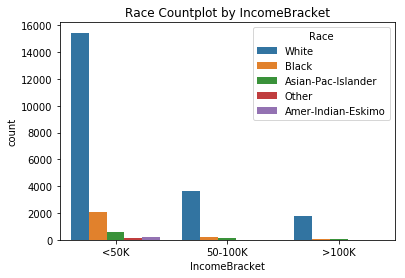

In [24]:
sns.countplot(x='IncomeBracket',hue='Race', data=trainingDF).set_title('Race Countplot by IncomeBracket')

We can see that **Black**, **Asian-Pac-Islander**, **Amer-Indian-Eskimo** and **Other** races mostly fall under the **<50k** bracket, therefore Race may be a good feature for classifying individual's income bracket.

#### FinalWeight Boxplot by IncomeBracket
Next we take a look at the ranges of FinalWeight by Income Bracket.

Text(0.5,1,'FinalWeight Boxplot by IncomeBrakcet')

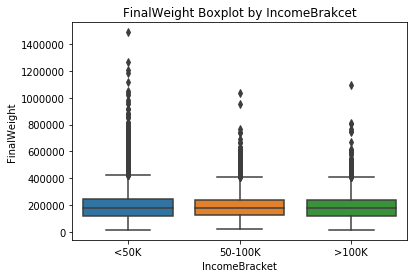

In [25]:
sns.boxplot(x="IncomeBracket", y="FinalWeight", data=trainingDF).set_title('FinalWeight Boxplot by IncomeBrakcet')

From the chart above, we can see that the final weight for <50k bracket has a higher variance comparing to the other two brackets, therefore for the larger numbers in final weight feature, we may be able to classify them into the <50k bracket.

#### CapitalLoss by IncomeBracket
Finally, we take a look at how capital loss is distributed for different brackets. We first remove the 0 values from capital loss feature in order to get a better view of the rest of the data.<br>
Then we plot a histogram of capital losses for each income bracket.

In [26]:
#Create temp dataframes for histogram plots, divide by income bracket and remove the 0 values
plotDF = trainingDF[trainingDF['IncomeBracket']=='<50K']
plotDF = plotDF[plotDF['CapitalLoss']!=0]
plotDF2 = trainingDF[trainingDF['IncomeBracket']=='50-100K']
plotDF2 = plotDF2[plotDF2['CapitalLoss']!=0]
plotDF3 = trainingDF[trainingDF['IncomeBracket']=='>100K']
plotDF3 = plotDF3[plotDF3['CapitalLoss']!=0]

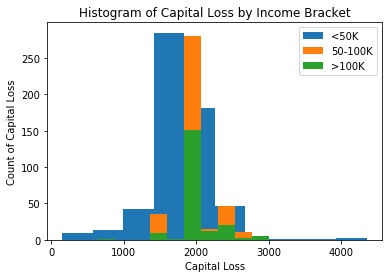

In [27]:
#Plot histograms
plt.hist(x='CapitalLoss',data=plotDF, label=['<50K'])
plt.hist(x='CapitalLoss',data=plotDF2, label=['50-100K'])
plt.hist(x='CapitalLoss',data=plotDF3, label=['>100K'])
plt.legend()
plt.xlabel('Capital Loss')
plt.ylabel('Count of Capital Loss')
plt.title('Histogram of Capital Loss by Income Bracket')
plt.show()

From the aggregated histogram, we can see that there's relatively clear separtion on the capital loss numbers for <50k bracket and the other brackets. Therefore the capital loss feature may be a good feature for classifying an individual's income.

### Visualize the Order of Feature Importance
Use the Random Forest Regressor to fit a model and get the **feature importance score** for each original feature.<br>
This method measures the impact of each feature on accuracy of the model. The general idea is to permute the values of each feature and measure how much the permutation decreases the accuracy of the model. For unimportant variables, the permutation should have little to no effect on model accuracy, while permuting important variables should significantly decrease it.<br>
Then plot importance scores to visually represent the importance of each feature.

In [28]:
#Use Random Forest Regressor to rank features based on their importance scores
Xtemp = trainDF.drop(['IncomeBracket'],axis=1)
ytemp = trainDF['IncomeBracket']
rftemp = RandomForestRegressor()
rftemp.fit(Xtemp, ytemp)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
#Create a list of all the original feature names
names = trainDF.columns.get_values().tolist()
names.remove('IncomeBracket')
#Get the list of importance score
scores = rftemp.feature_importances_.tolist()

- Plot a pie chart to show the weight of each feature
- Plot a bar chart to show the importance of each feature comparing to each other

In [30]:
count=[]
i = 1
while int(i) < 44:
    count.append(i)
    i=int(i)+1

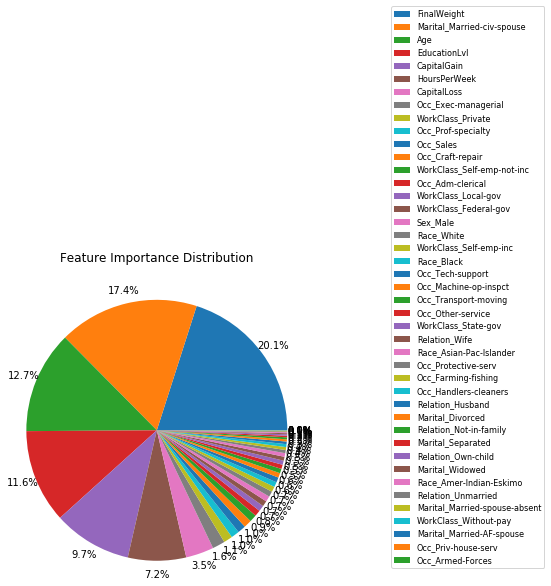

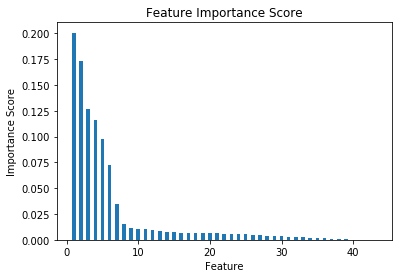

Comment: the two figures above follow the same order of legend


In [31]:
plotDF = pd.DataFrame(columns=['names','scores','indexN'])
plotDF['names']=names
plotDF['scores']=scores
plotDF['indexN']=count
plotDF = plotDF.sort_values('scores',ascending=False).reset_index(drop=True)
ynum = plotDF['scores'].tolist()
legendlist = plotDF['names'].tolist()


plt.figure(0,figsize=(5,5))
plt.axis("equal")
ax=plt.pie(ynum, autopct="%1.1f%%", startangle=0, pctdistance=1.1,labeldistance=2,radius=1.2)
plt.legend(legendlist, bbox_to_anchor=(1.6,0.9),loc='center right',fontsize=8,
           bbox_transform=plt.gcf().transFigure)
plt.title("Feature Importance Distribution",y=1.1)

#--------------------------------------------------

plt.figure(1)
plt.bar(count, ynum, width = 0.5)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance Score")
plt.show()
print('Comment: the two figures above follow the same order of legend')

In [32]:
ynum[:7]

[0.2006426395077166,
 0.17355984963901788,
 0.1268419658565185,
 0.11597258184217907,
 0.09724508118099093,
 0.07201993665578003,
 0.03462911671065575]

In [33]:
legendlist[:7]

['FinalWeight',
 'Marital_Married-civ-spouse',
 'Age',
 'EducationLvl',
 'CapitalGain',
 'HoursPerWeek',
 'CapitalLoss']

#### Features Most Related to Income Bracket
As we can see from the above analysis, the top 7 features related to an individual's income bracket are: **FinalWeight**, **MartialStatus(being married civ spouse)**, **Age**, **EducationLvl**, **CapitalGain**, **HoursPerWeek**, and **CapitalLoss**. <br>
These are features with importance score higher than 3%.

## 3. Feature Selection

The features in the data will directly influence the predictive models we use and the results we can achieve. Better features means flexibility, simpler model, and better results. <br>
The flexibility of good features will allow us to use less complex models that are faster to run, easier to understand and easier to maintain. With good features, we would be closer to the underlying problem and a representation of all the data available and could use to best characterize that underlying problem.
- Creating new feature
- Selecting features for building model

### Creating New Feature

First, we can combine CapitalGain and CapitalLoss features to a new feature called Capital.<br>
**Capital = CapitalGain - CapitalLoss**<br>
By aggregating CapitalGain and CapitalLoss, we can use one feature to represent both the gain and loss.

In [34]:
#Create the new feature for trainDF
capitalgain = trainDF['CapitalGain'].tolist()
capitalloss = trainDF['CapitalLoss'].tolist()
capital = []
tempnum = 0
j = 0
#Lopp through each row to calculate the capital number
for i in capitalgain:
    tempnum = i - capitalloss[j]
    capital.append(tempnum)
    tempnum = 0
    j+=1
#Add the Capital feature and drop CapitalGain and CapitalLoss feature
trainDF['Capital'] = capital
trainDF = trainDF.drop(['CapitalGain'], axis=1)
trainDF = trainDF.drop(['CapitalLoss'], axis=1)

In [35]:
#Create the new feature for testDF as well
capitalgain2 = testDF['CapitalGain'].tolist()
capitalloss2 = testDF['CapitalLoss'].tolist()
capital2 = []
tempnum2 = 0
j2 = 0
#Lopp through each row to calculate the capital number
for i in capitalgain2:
    tempnum2 = i - capitalloss2[j2]
    capital2.append(tempnum2)
    tempnum2 = 0
    j2+=1
#Add the Capital feature and drop CapitalGain and CapitalLoss feature
testDF['Capital'] = capital2
testDF = testDF.drop(['CapitalGain'], axis=1)
testDF = testDF.drop(['CapitalLoss'], axis=1)

### Feature Selection
After creating the new Capital feature and dropping two features (CapitalGain and CapitalLoss), we run the Random Forest Regressor to get the feature importance score. To avoid overfitting, we would only select features with higher than 0.01 importance score. This allows us to a retain a decent amount of important features for classification, while not prone to overfitting.

In [36]:
#Use Random Forest Regressor to rank features based on their importance scores
Xselect = trainDF.drop(['IncomeBracket'],axis=1)
yselect = trainDF['IncomeBracket']
rfselect = RandomForestRegressor()
rfselect.fit(Xselect, yselect)
#print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
#Create a list of all the original feature names
names1 = trainDF.columns.get_values().tolist()
names1.remove('IncomeBracket')
#Get the list of importance score
scores1 = rfselect.feature_importances_.tolist()

In [38]:
selectDF = pd.DataFrame(columns=['names','scores'])
selectDF['names']=names1
selectDF['scores']=scores1
selectDF = selectDF.sort_values('scores',ascending=False).reset_index(drop=True)
ytemp = selectDF['scores'].tolist()
legendtemp = selectDF['names'].tolist()

In [39]:
selectDF.head(9)

,names,scores
0,FinalWeight,0.203227
1,Marital_Married-civ-spouse,0.175309
2,Capital,0.132689
3,Age,0.128668
4,EducationLvl,0.113039
5,HoursPerWeek,0.072158
6,Occ_Exec-managerial,0.015258
7,WorkClass_Private,0.010840
8,Occ_Prof-specialty,0.009697


## 4. Model Implementation

Now we have finished the data cleaning and feature selection, we will proceed with implementing the classification algorithms on the training data.<br>
The four classification algorithms that will be used are **k-NN**, **Logistic Regression**, **Decision Trees**, and **Random Forest**.

In [40]:
selectedDF = trainDF[['FinalWeight','Marital_Married-civ-spouse','Capital','Age','EducationLvl','HoursPerWeek',
             'Occ_Exec-managerial','WorkClass_Private','Occ_Sales','IncomeBracket']]
labels = ['FinalWeight','Marital_Married-civ-spouse','Capital','Age','EducationLvl','HoursPerWeek',
             'Occ_Exec-managerial','WorkClass_Private','Occ_Sales']
X = selectedDF.drop(['IncomeBracket'],axis=1)
y = selectedDF['IncomeBracket']

#### k-NN
k-NN algorithm uses the k nearest training examples to place a new object into a specific class.<br>

**Pros:**
- Flexible to feature/distance choices
- Naturally handles multi-class cases
- Can do well in practice with enough representative data

**Cons:**
- Require a large search problem to find the nearest neighbours
- Efficiency may decline as dimensionality increases
- Different features may be measured with different metrics

Overall, the k-NN algorithm is a well-used machine learning algorithm, it is very easy to understand and implement.

In [41]:
knn = neighbors.KNeighborsClassifier()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    knn.fit(X_train, y_train)
    
    predictions = knn.predict(X_test)
    
    ACC = metrics.accuracy_score(y_test,predictions)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))  

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.761%
Fold 2: Accuracy: 0.751%
Fold 3: Accuracy: 0.757%
Fold 4: Accuracy: 0.772%
Fold 5: Accuracy: 0.773%
Fold 6: Accuracy: 0.754%
Fold 7: Accuracy: 0.76%
Fold 8: Accuracy: 0.753%
Fold 9: Accuracy: 0.76%
Fold 10: Accuracy: 0.761%
Average Score: 76.021%(0.698%)


#### Logistic Regression
Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine a categorical outcome.<br>

**Pros:**
- Convenient probability scores for observations
- Efficient implementation

**Cons:**
- Doesn't perform well when feature space is too large
- Doesn't handle large number of categorical features well
- Relies on entire data

Since the size of features in our dataset is relatively small to medium (after feature selection), logistic regression can be a good method for classification.

In [42]:
model = LogisticRegression()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    ACC = metrics.accuracy_score(y_test,predictions)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.772%
Fold 2: Accuracy: 0.759%
Fold 3: Accuracy: 0.766%
Fold 4: Accuracy: 0.782%
Fold 5: Accuracy: 0.785%
Fold 6: Accuracy: 0.769%
Fold 7: Accuracy: 0.767%
Fold 8: Accuracy: 0.764%
Fold 9: Accuracy: 0.777%
Fold 10: Accuracy: 0.765%
Average Score: 77.073%(0.807%)


#### Decision Trees
Decision tree builds classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. It can handle both categorical and numerical data.<br>

**Pros:**
- Intuitive decision rules
- Can handle non-linear features
- Take into account variable interactions

**Cons:**
- Highly biased to training set
- No ranking score as direct result

Even though Decision Tress can be really biased, it is indeed a very intuitive algrithm. Since the algorithm and results are both really easy to understand and interpret, it is good candidate to solve the classification problem.

In [43]:
dtree = DecisionTreeClassifier()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    dtree.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    ACC = metrics.accuracy_score(y_test,predictions)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.773%
Fold 2: Accuracy: 0.759%
Fold 3: Accuracy: 0.766%
Fold 4: Accuracy: 0.781%
Fold 5: Accuracy: 0.784%
Fold 6: Accuracy: 0.769%
Fold 7: Accuracy: 0.766%
Fold 8: Accuracy: 0.763%
Fold 9: Accuracy: 0.777%
Fold 10: Accuracy: 0.765%
Average Score: 77.028%(0.776%)


#### Random Forest
Random Forest is an ensemble method for classification. The model employs a number of decision trees and each decision tree has a vote. The majority outcome wins as the outcome of the model. The randomness comes from each decision tree taking random sets of feature variables.<br>

**Pros:**
- Use random sample of features for random subsets of the original data
- Reduce correlation between trees

**Cons:**
- The alogrithm works as a black box, hard to interpret what it is actually doing
- Require longer time to perform when feature size is large

Random Forest algorithm is not prone to overfit, captures the nonlinearity of features and reduces the correlation between each decision tree. It is a good ensemble method for classification problems with little bias.

In [44]:
rf = RandomForestClassifier()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    rf.fit(X_train, y_train)
    
    predictions = rf.predict(X_test)
    
    ACC = metrics.accuracy_score(y_test,predictions)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.777%
Fold 2: Accuracy: 0.776%
Fold 3: Accuracy: 0.776%
Fold 4: Accuracy: 0.779%
Fold 5: Accuracy: 0.787%
Fold 6: Accuracy: 0.793%
Fold 7: Accuracy: 0.786%
Fold 8: Accuracy: 0.782%
Fold 9: Accuracy: 0.792%
Fold 10: Accuracy: 0.778%
Average Score: 78.277%(0.617%)


#### Model Accuracy
From the above outputs, we can see that **random forest algorithm** has the highest average accuracy score with the lowest standard deviation. Therefore, we can determine that random forest has the best performance among the four algorithms.

## 5. Model Tuning

We first split the training set used for tuning.

In [45]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, random_state=42, test_size=0.3)

Then, for each model, we use the **grid search** method to tune its parameters. 

#### k-NN Model Tuning

In [46]:
#Parameters for k-NN
list20 = list(range(0,20))
oddlist = list(filter(lambda x: x % 2 != 0, list20))
kNN_parameters = {'n_neighbors': oddlist}
#Tune model with 10 folds
knn_t = GridSearchCV(estimator = neighbors.KNeighborsClassifier(), param_grid = kNN_parameters, cv = 10, scoring='accuracy')
#Fit model
knn_t.fit(X_train_t,y_train_t)
print("Best parameters tuned for k-NN:", knn_t.best_params_)
print("Best score tuned for k-NN:", knn_t.best_score_) 

Best parameters tuned for k-NN: {'n_neighbors': 13}
Best score tuned for k-NN: 0.7741897741897742


#### Logistic Regression Model Tuning

In [47]:
#Parameters for Logistic Regression
log_parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
#Tune model with 10 folds
log_t = GridSearchCV(estimator = LogisticRegression(), param_grid = log_parameters, 
                   cv = 10, scoring='accuracy')
#Fit model
log_t.fit(X_train_t,y_train_t)
print("Best parameters tuned for Logistic Regression:", log_t.best_params_)
print("Best score tuned for Logistic Regression:", log_t.best_score_) 

Best parameters tuned for Logistic Regression: {'C': 0.1, 'penalty': 'l1'}
Best score tuned for Logistic Regression: 0.7933192933192933


#### Decision Trees Model Tuning

In [48]:
#Parameters for Decision Trees
dtree_parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10],
              "max_depth": [None, 2, 5],
              "min_samples_leaf": [1, 5],
              "max_leaf_nodes": [None, 5, 10],
              }
#Tune model with 10 folds
dtree_t = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = dtree_parameters, 
                   cv = 10, scoring='accuracy')
#Fit model
dtree_t.fit(X_train_t,y_train_t)
print("Best parameters tuned for Decision Trees:", dtree_t.best_params_)
print("Best score tuned for Decision Trees:", dtree_t.best_score_) 

Best parameters tuned for Decision Trees: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score tuned for Decision Trees: 0.8021528021528022


#### Random Forest Model Tuning

In [49]:
#Parameters for Random Forest
rf_parameters = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 3, 5],
    'bootstrap': [True, False]
}
#Tune model with 10 folds
rf_t = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_parameters, 
                   cv = 10, scoring='accuracy')
#Fit model
rf_t.fit(X_train_t,y_train_t)
print("Best parameters tuned for Random Forest:", rf_t.best_params_)
print("Best score tuned for Random Forest:", rf_t.best_score_) 

Best parameters tuned for Random Forest: {'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
Best score tuned for Random Forest: 0.8051363051363052


#### Model Comparison

To compare the performances of four models, we compare the **accuracy** and **true positive rate** of each model.<br>
- **Accuracy**: we have calculated this in the previous tuning step
- **True positive rate (recall)**: we will calculate this in the following sections

#### TPR for k-NN

In [50]:
knn_c = neighbors.KNeighborsClassifier(n_neighbors=13)
y_pred_knn = knn_c.fit(X_train_t, y_train_t).predict(X_test_t)
metrics.recall_score(y_test_t,y_pred_knn,average='micro')

0.77808107001501292

#### TPR for Logistic Regression

In [51]:
log_c = LogisticRegression(C=0.1, penalty='l1')
y_pred_log = log_c.fit(X_train_t, y_train_t).predict(X_test_t)
metrics.recall_score(y_test_t,y_pred_log,average='micro')

0.79432236931895728

#### TPR for Decision Trees

In [52]:
dtree_c = DecisionTreeClassifier(criterion='gini', max_depth=5, max_leaf_nodes=None, 
                                 min_samples_leaf=1, min_samples_split=2)
y_pred_dtree = dtree_c.fit(X_train_t, y_train_t).predict(X_test_t)
metrics.recall_score(y_test_t,y_pred_dtree,average='micro')

0.80292070424457485

#### TPR for Random Forest

In [53]:
rf_c = RandomForestClassifier(bootstrap=False, max_depth=5, max_features='sqrt', n_estimators=200)
y_pred_rf = rf_c.fit(X_train_t, y_train_t).predict(X_test_t)
metrics.recall_score(y_test_t,y_pred_rf,average='micro')

0.80824348300805238

### Final Optimal Model
As we can see from the above analysis, **Random Forest Algorithm** has both the highest accuracy and true positive rate. Therefore, Random Forest is chosen as the final optimal model.

## 6. Testing

Finally, we use the optimal model **'Random Forest'** to make predictions on the test data.

In [54]:
#Split the features and target for testing data
selectedTestDF = testDF[['FinalWeight','Marital_Married-civ-spouse','Capital','Age','EducationLvl','HoursPerWeek',
             'Occ_Exec-managerial','WorkClass_Private','Occ_Sales','IncomeBracket']]
XTest = selectedTestDF.drop(['IncomeBracket'],axis=1)
yTest = selectedTestDF['IncomeBracket']

#Fit Random Forest model and predict on the testing data
rfc = RandomForestClassifier(bootstrap=False, max_depth=5, max_features='sqrt', n_estimators=200)
final_model = rfc.fit(X,y)
final_prediction = final_model.predict(XTest)

#print prediction accuracy
metrics.accuracy_score(yTest,final_prediction)

0.79665875030710021

- The model (trained with the entire training data) has a **79.67% accuracy** on predicting the testing data.
- It is slightly lower than the accuracy rate on training data (**80.51%**), which is understandable. 
- The model was built and tuned using the training data, therefore it would fit better within the training data.
- However, the accuracy rate for testing data is also quite high and close to the accuracy rate for training data, therefore we can conclude the **Random Forest model** is a **decent model to classifiy individual's income bracket**.